In [1]:
import os 
import pandas as pd 
import sys 
import re 

current_path = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_path,'..','..','..'))  # '..','..','..'
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)

# from experiences.pipeline_desag.results.pipeline_subway_in_netmob.pipeline_subway_in_netmob import results 
from experiences.pipeline_desag.results.pipeline_bike_out.pipeline_bike_out import results
def parse_experiment_results(results_str):
    results = "contextual_kwargs1"
    for line in results_str.strip().split('\n'):
        match = re.match(r'^(.*?):\s+All Steps RMSE = ([\d.]+), MAE = ([\d.]+), MASE = ([\d.]+), MAPE = ([\d.]+)$', line)
        if match:
            exp_name = match.group(1).strip()
            rmse = float(match.group(2))
            mae = float(match.group(3))
            mase = float(match.group(4))
            mape = float(match.group(5))
            results[exp_name] = {'rmse': rmse, 'mae': mae, 'mase': mase, 'mape': mape,
                                 'id':exp_name.split('_bis')[0],
                                 'bis': exp_name.split('_bis')[1],
                                 'horizon': exp_name.split('_h')[-1].split('_bis')[0]
                                 }
    return results


parsed_results = parse_experiment_results(results)
parsed_results = pd.DataFrame.from_dict(parsed_results, orient='index')
parsed_results.index.name = 'experiment'

for horizon in parsed_results['horizon'].unique():
    print(f"Horizon: {horizon}")
    df_h = parsed_results[parsed_results['horizon']==horizon]
    display(df_h.groupby(['id']).agg(rmse = ('rmse','mean'),
                                    mae = ('mae','mean'),
                                    mase = ('mase','mean')).reset_index().sort_values(by='rmse'))

print('List of configurations processed:')
for x in set([x.split('_h')[0] for x in parsed_results['id']]):
    print(f'- {x}')

Horizon: 1


id    rmse     mae    mase
2  STAEformer_bike_out_bike_in_calendar_early_fus...  4.2652  2.7556  0.7156
3  STAEformer_bike_out_bike_in_calendar_late_fusi...  4.2862  2.7624  0.7174
5              STAEformer_bike_out_calendar__e100_h1  4.2932  2.7720  0.7198
4  STAEformer_bike_out_bike_in_calendar_late_fusi...  4.2948  2.7748  0.7206
7  STAEformer_bike_out_subway_in_subway_out_calen...  4.3032  2.7788  0.7216
0  STAEformer_bike_out_bike_in_calendar_early_fus...  4.3134  2.7854  0.7232
6  STAEformer_bike_out_subway_in_subway_out_calen...  4.3210  2.7868  0.7236
1  STAEformer_bike_out_bike_in_calendar_early_fus...  4.3216  2.7810  0.7220

Horizon: 4


id    rmse     mae    mase
4  STAEformer_bike_out_bike_in_calendar_late_fusi...  4.8602  3.0506  0.7920
2  STAEformer_bike_out_bike_in_calendar_early_fus...  4.8758  3.0470  0.7908
1  STAEformer_bike_out_bike_in_calendar_early_fus...  4.8762  3.0654  0.7956
5              STAEformer_bike_out_calendar__e100_h4  4.8786  3.0736  0.7978
7  STAEformer_bike_out_subway_in_subway_out_calen...  4.8878  3.0622  0.7950
3  STAEformer_bike_out_bike_in_calendar_late_fusi...  4.8906  3.0686  0.7968
0  STAEformer_bike_out_bike_in_calendar_early_fus...  4.9430  3.0928  0.8028
6  STAEformer_bike_out_subway_in_subway_out_calen...  4.9622  3.0962  0.8036

List of configurations processed:
- STAEformer_bike_out_bike_in_calendar_early_fusion_shared_embedding__e100
- STAEformer_bike_out_bike_in_calendar_early_fusion_BackBone_InEmb24_adp16__e100
- STAEformer_bike_out_bike_in_calendar_late_fusion_BackBone_InEmb24_adp16__e100
- STAEformer_bike_out_bike_in_calendar_early_fusion_independant_embedding__e100
- STAEformer_bike_out_subway_in_subway_out_calendar_early_fusion_CrossAttnBackBone_InEmb24_ctxInEmb8_adp16_adpQ0__e100
- STAEformer_bike_out_calendar__e100
- STAEformer_bike_out_subway_in_subway_out_calendar_late_fusion_CrossAttnBackBone_InEmb24_ctxInEmb8_adp16_adpQ0__e100
- STAEformer_bike_out_bike_in_calendar_late_fusion_simple_embedding__e100


/root/anaconda3/envs/pytorch-2.0.1/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


No module xgboost
Training and Hyper-parameter tuning with Ray is not possible
Training and Hyper-parameter tuning with Ray is not possible

re._pattern:  STAEformer_bike_out_(?:bike_in|calendar).*?bis
trials found:  12
   STAEformer_bike_out_bike_in_calendar_late_fusion_BackBone_InEmb24_adp16__e100_h1
   STAEformer_bike_out_bike_in_calendar_early_fusion_shared_embedding__e100_h4
   STAEformer_bike_out_bike_in_calendar_late_fusion_simple_embedding__e100_h1
   STAEformer_bike_out_calendar__e100_h4
   STAEformer_bike_out_bike_in_calendar_late_fusion_BackBone_InEmb24_adp16__e100_h4
   STAEformer_bike_out_bike_in_calendar_late_fusion_simple_embedding__e100_h4
   STAEformer_bike_out_bike_in_calendar_early_fusion_shared_embedding__e100_h1
   STAEformer_bike_out_bike_in_calendar_early_fusion_independant_embedding__e100_h1
   STAEformer_bike_out_bike_in_calendar_early_fusion_BackBone_InEmb24_adp16__e100_h4
   STAEformer_bike_out_calendar__e100_h1
   STAEformer_bike_out_bike_in_calendar_early_f

/home/rrochas/prediction-validation/pipeline/clustering/clustering.py:322: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linked = linkage(self.dist_matrix.values, method=self.model.linkage)


Model1 correspond to :  STAEformer_bike_out_calendar__e100_h1_bis
Model2 correspond to :  STAEformer_bike_out_bike_in_calendar_late_fusion_BackBone_InEmb24_adp16__e100_h1_bis
real.size(): torch.Size([4989, 26])
predict1.size(): torch.Size([4989, 26])
predict2.size(): torch.Size([4989, 26])
real.size(): torch.Size([4989, 26])
predict1.size(): torch.Size([4989, 26])
predict2.size(): torch.Size([4989, 26])
real.size(): torch.Size([4989, 26])
predict1.size(): torch.Size([4989, 26])
predict2.size(): torch.Size([4989, 26])
real.size(): torch.Size([4989, 26])
predict1.size(): torch.Size([4989, 26])
predict2.size(): torch.Size([4989, 26])
real.size(): torch.Size([4989, 26])
predict1.size(): torch.Size([4989, 26])
predict2.size(): torch.Size([4989, 26])


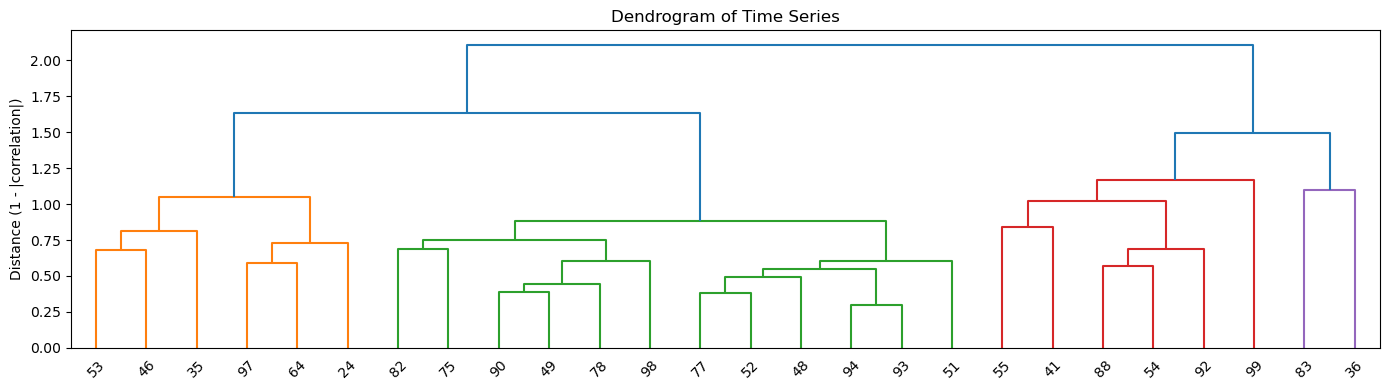

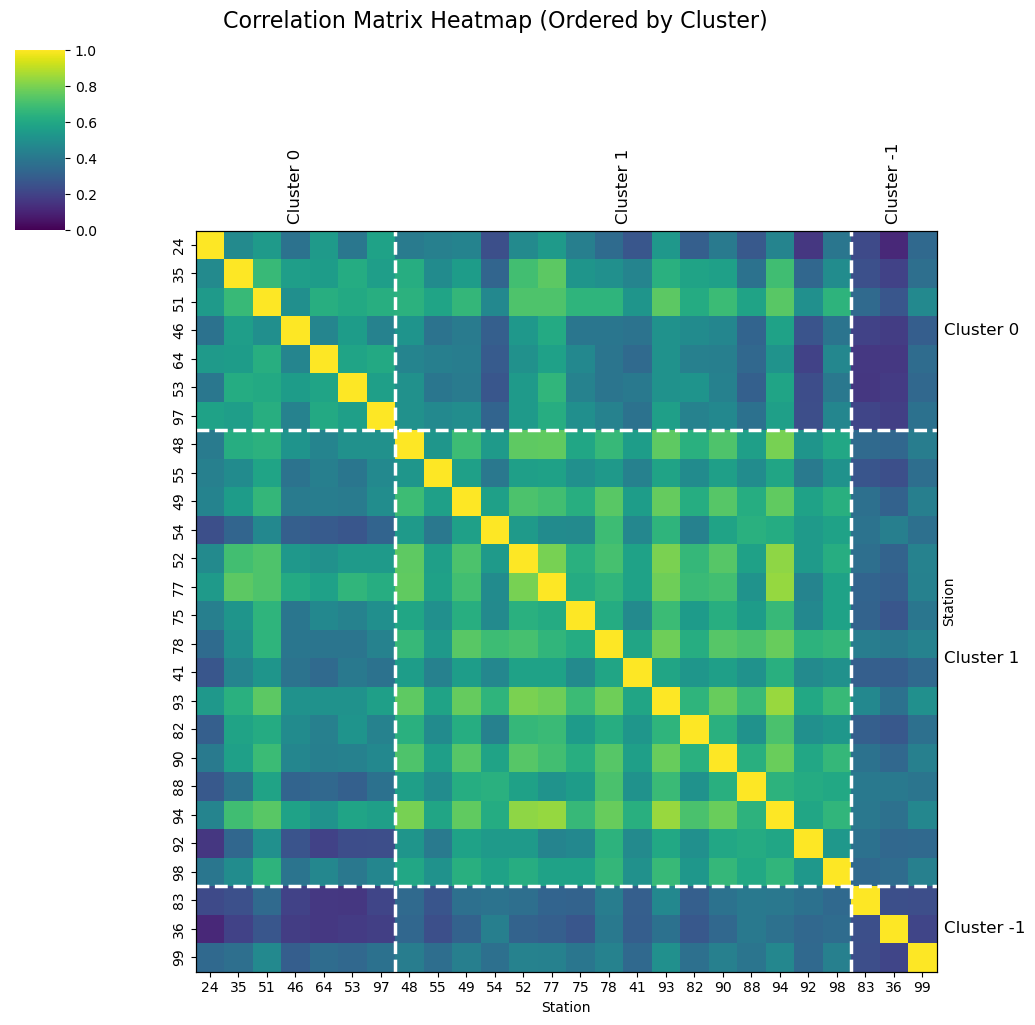

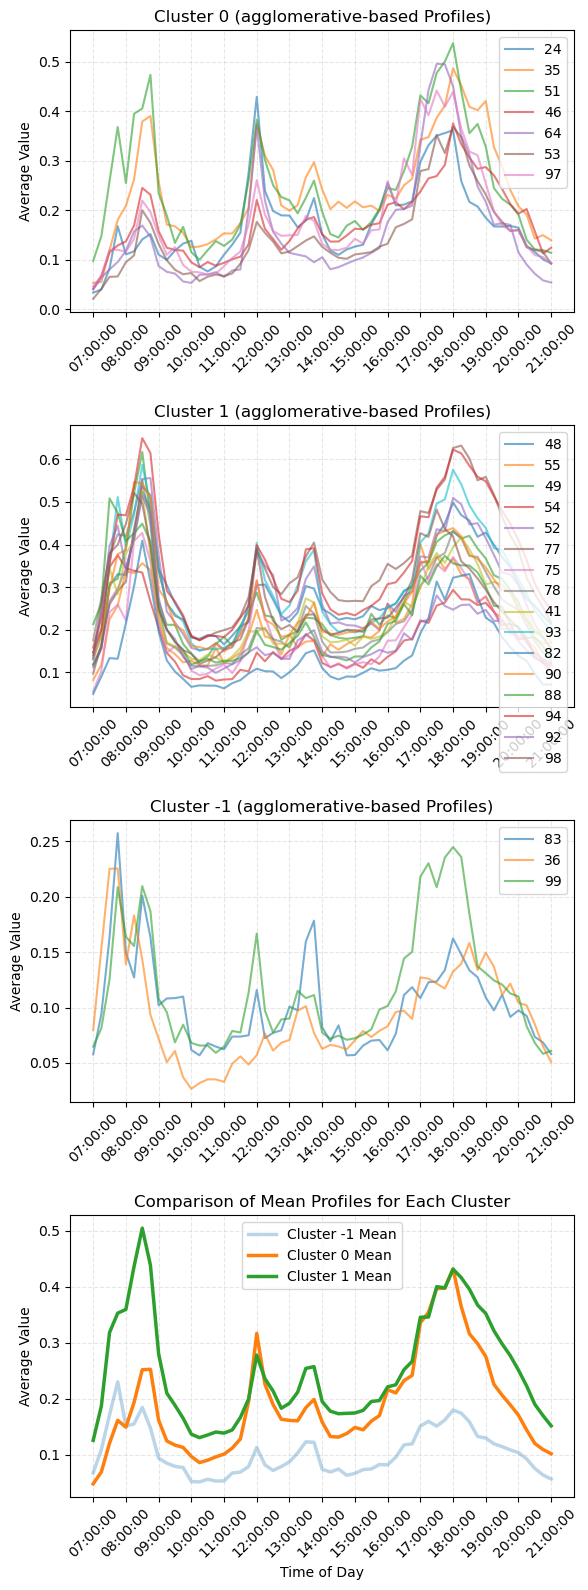

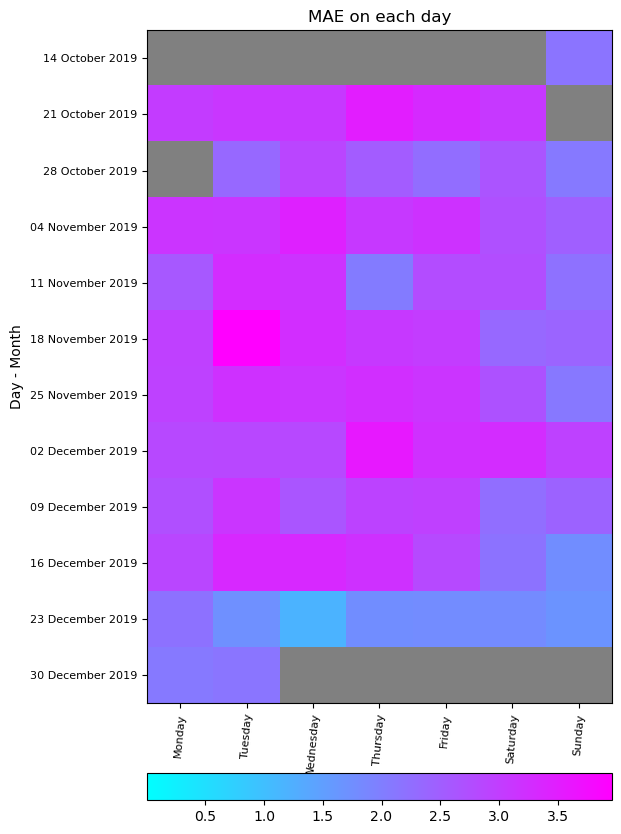

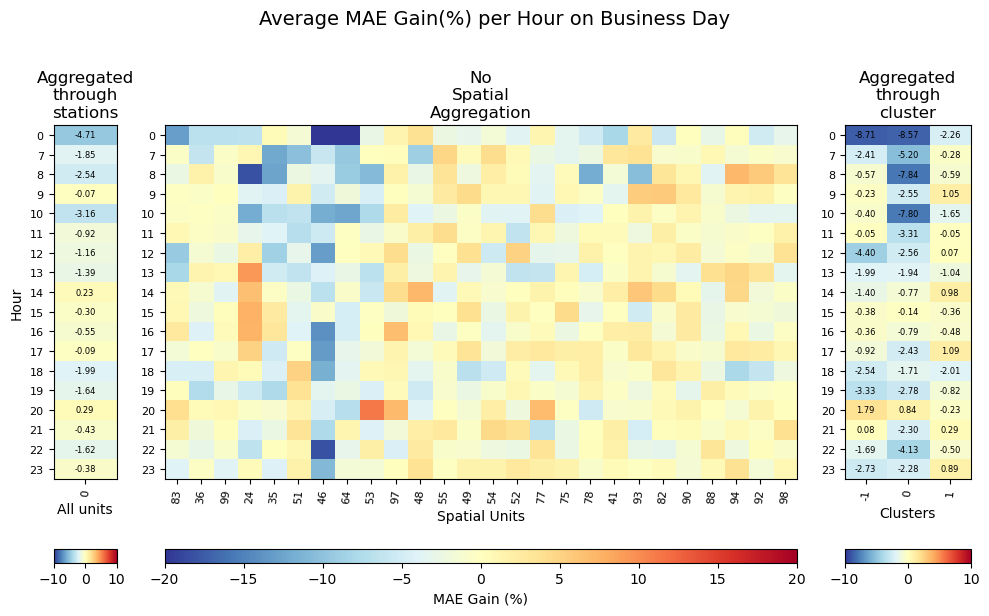


Comparison on between models across all time-slots followed by comparison on Rainy Events Only
Number of rainy time-slots in the train set:
 Between 0 and 0.05 mm: 755, i.e 5.04 % of the train set and 36.14 % of the rainy time-slots
 Between 0.05 and 0.5 mm: 1003, i.e 6.70 % of the train set and 48.01 % of the rainy time-slots
 Between 0.5 and 1 mm: 338, i.e 2.26 % of the train set and 16.18 % of the rainy time-slots
 Between 1 and inf mm: 446, i.e 2.98 % of the train set and 21.35 % of the rainy time-slots
Number of rainy time-slots in the train set: 2089, i.e 13.96 % of the train set
Number of rainy time-slots in the test set: 1158, i.e 23.21 % of the test set

Model1 correspond to :  STAEformer_bike_out_calendar__e100_h1_bis
Model2 correspond to :  STAEformer_bike_out_bike_in_calendar_late_fusion_BackBone_InEmb24_adp16__e100_h1_bis
real.size(): torch.Size([1158, 26])
predict1.size(): torch.Size([1158, 26])
predict2.size(): torch.Size([1158, 26])
real.size(): torch.Size([1158, 26])


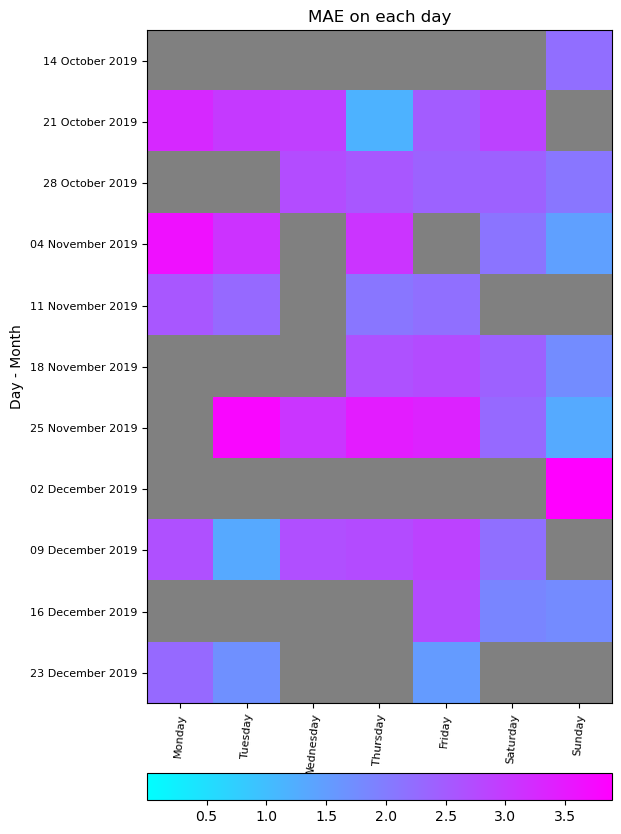

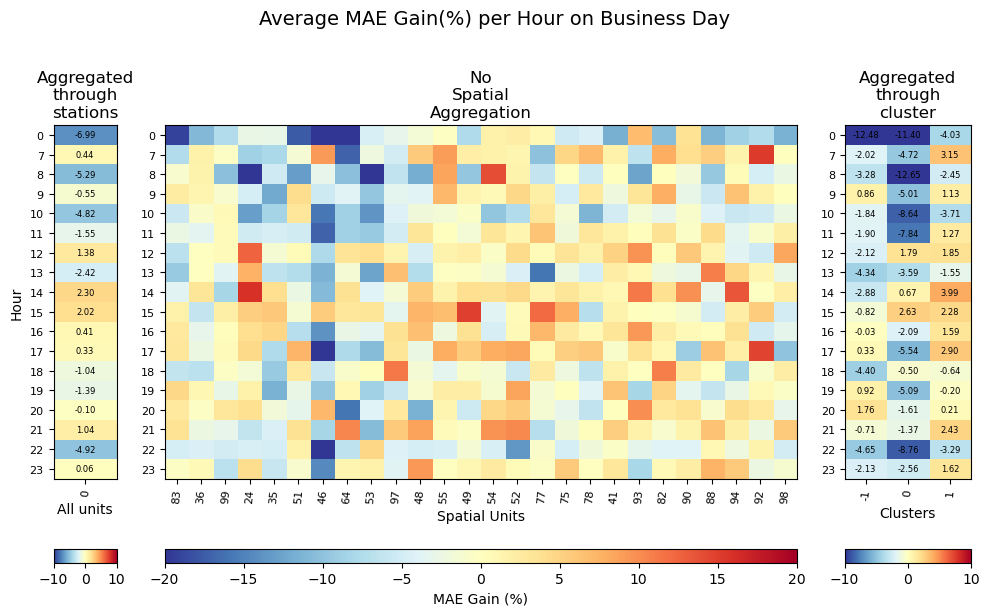


STAEformer_bike_out_calendar__e100_h1:   All Steps RMSE = 4.06664, MAE = 2.57112, MASE = 0.76915, MAPE = 51.49595
STAEformer_bike_out_bike_in_calendar_late_fusion_BackBone_InEmb24_adp16__e100_h1:   All Steps RMSE = 4.07957, MAE = 2.57314, MASE = 0.76976, MAPE = 51.25290

Trial ID 1:  _STAEformer_bike_out_calendar__e100_h1_bis1_f5
Trial ID 2:  _STAEformer_bike_out_bike_in_calendar_late_fusion_simple_embedding__e100_h1_bis1_f5
model_save_path for trial id1:  /home/rrochas/prediction-validation/save/K_fold_validation/training_wo_HP_tuning/pipeline_bike_out/bike_out_STAEformer/best_models/STAEformer_bike_out_calendar__e100_h1_bis1_f5.pkl
----------------------------------------
Loading the Complete Dataset for K-fold splitting
Coverage Period: 35040 elts between 2019-01-01 00:00:00 and 2019-12-31 23:45:00
Invalid dates within this fold: 1233

>>>Tackle Target dataset: bike_out
Loading from /home/rrochas/../../data/rrochas/prediction_validation/agg_data/velov/velov_emitted_by_station15min.

/home/rrochas/prediction-validation/pipeline/clustering/clustering.py:322: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linked = linkage(self.dist_matrix.values, method=self.model.linkage)


Model1 correspond to :  STAEformer_bike_out_calendar__e100_h1_bis
Model2 correspond to :  STAEformer_bike_out_bike_in_calendar_late_fusion_simple_embedding__e100_h1_bis
real.size(): torch.Size([4989, 26])
predict1.size(): torch.Size([4989, 26])
predict2.size(): torch.Size([4989, 26])
real.size(): torch.Size([4989, 26])
predict1.size(): torch.Size([4989, 26])
predict2.size(): torch.Size([4989, 26])
real.size(): torch.Size([4989, 26])
predict1.size(): torch.Size([4989, 26])
predict2.size(): torch.Size([4989, 26])
real.size(): torch.Size([4989, 26])
predict1.size(): torch.Size([4989, 26])
predict2.size(): torch.Size([4989, 26])
real.size(): torch.Size([4989, 26])
predict1.size(): torch.Size([4989, 26])
predict2.size(): torch.Size([4989, 26])


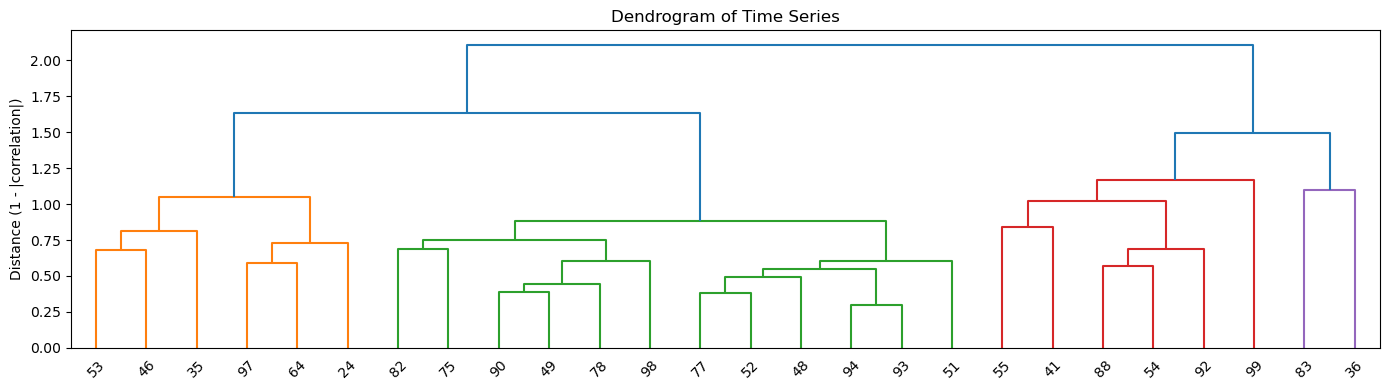

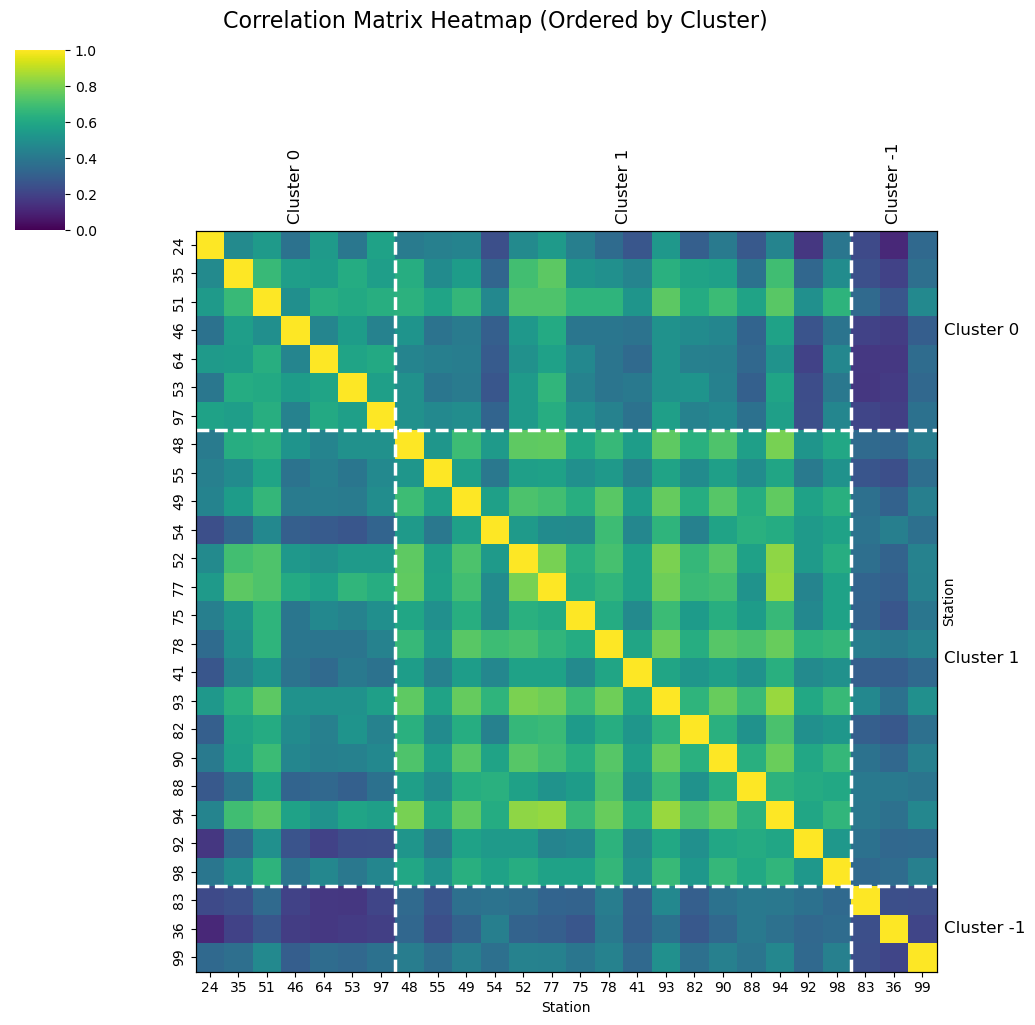

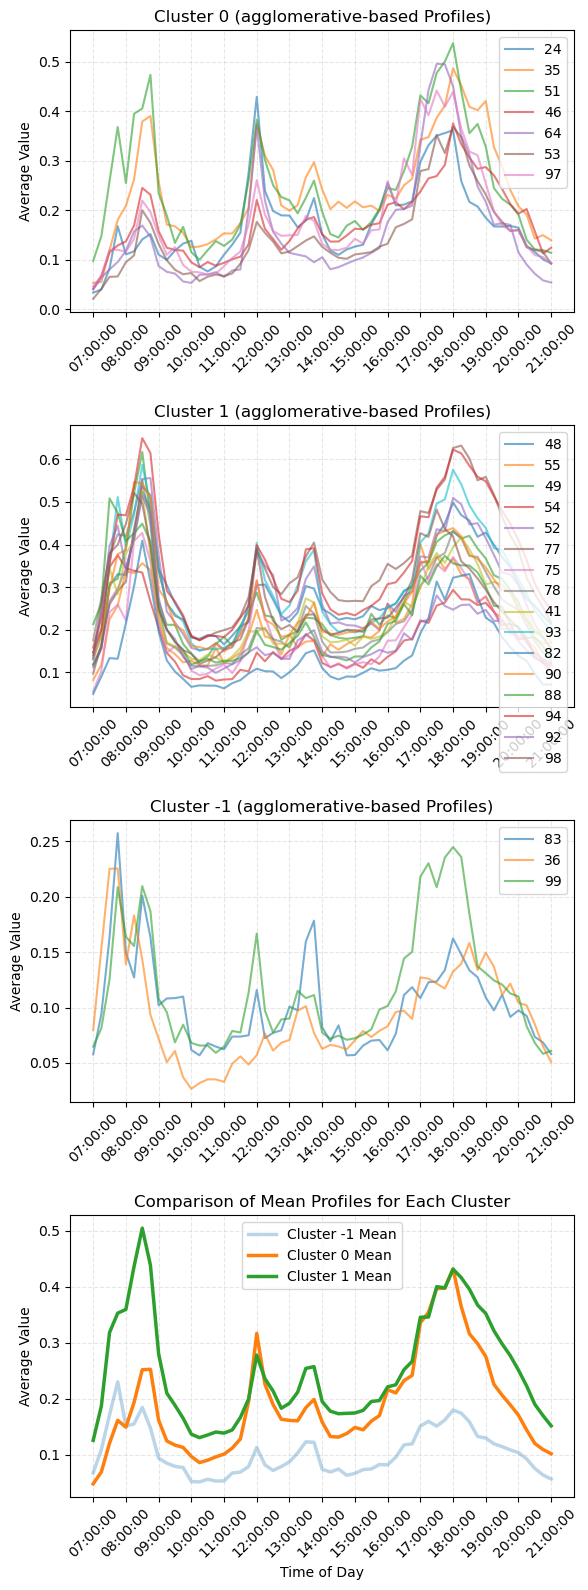

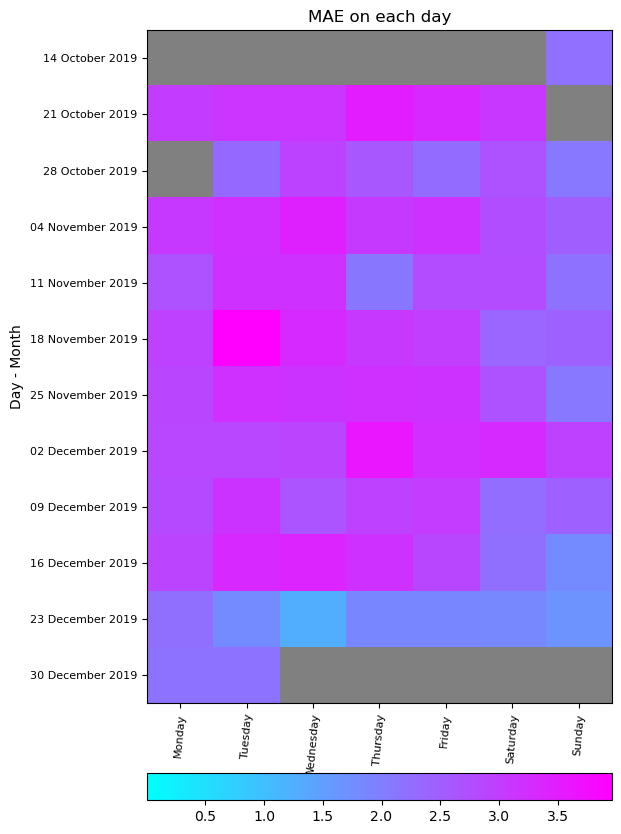

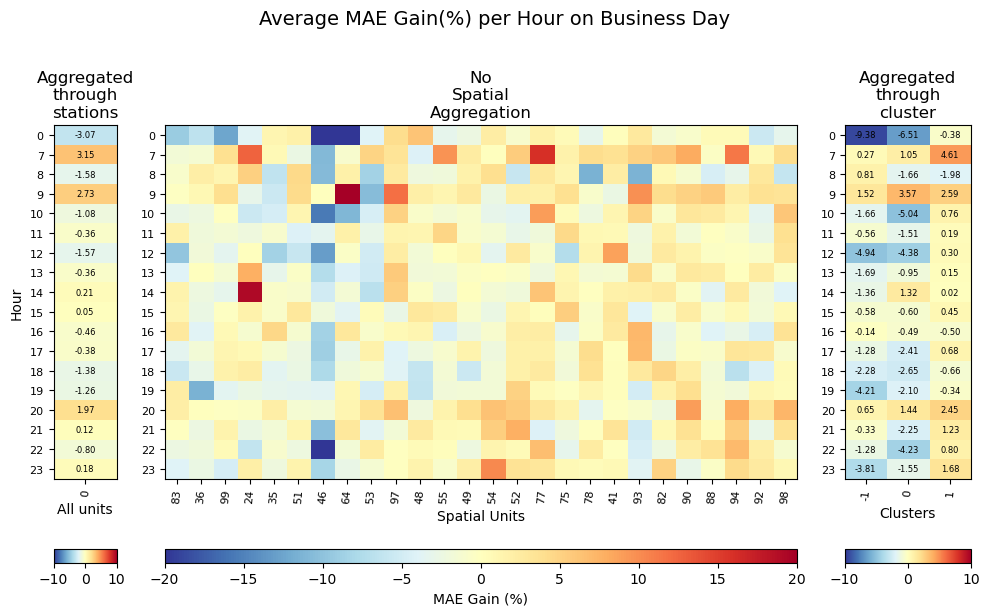


Comparison on between models across all time-slots followed by comparison on Rainy Events Only
Number of rainy time-slots in the train set:
 Between 0 and 0.05 mm: 755, i.e 5.04 % of the train set and 36.14 % of the rainy time-slots
 Between 0.05 and 0.5 mm: 1003, i.e 6.70 % of the train set and 48.01 % of the rainy time-slots
 Between 0.5 and 1 mm: 338, i.e 2.26 % of the train set and 16.18 % of the rainy time-slots
 Between 1 and inf mm: 446, i.e 2.98 % of the train set and 21.35 % of the rainy time-slots
Number of rainy time-slots in the train set: 2089, i.e 13.96 % of the train set
Number of rainy time-slots in the test set: 1158, i.e 23.21 % of the test set

Model1 correspond to :  STAEformer_bike_out_calendar__e100_h1_bis
Model2 correspond to :  STAEformer_bike_out_bike_in_calendar_late_fusion_simple_embedding__e100_h1_bis
real.size(): torch.Size([1158, 26])
predict1.size(): torch.Size([1158, 26])
predict2.size(): torch.Size([1158, 26])
real.size(): torch.Size([1158, 26])
predic

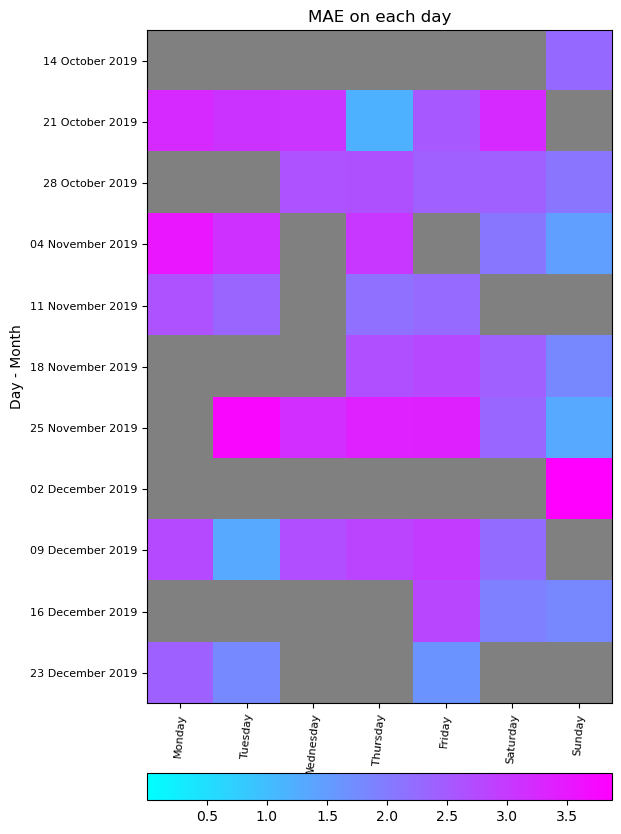

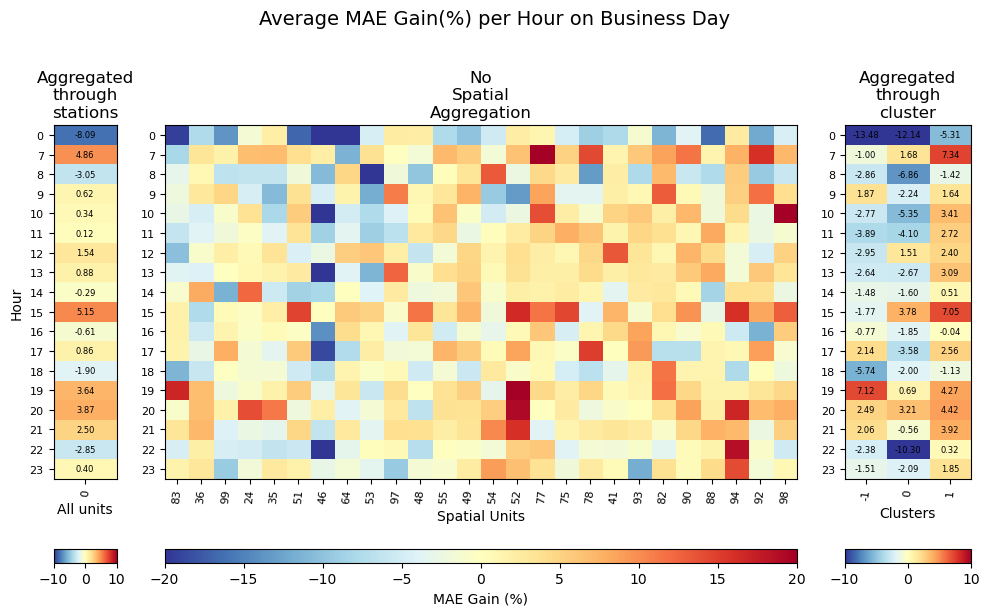


STAEformer_bike_out_calendar__e100_h1:   All Steps RMSE = 4.06664, MAE = 2.57112, MASE = 0.76915, MAPE = 51.49595
STAEformer_bike_out_bike_in_calendar_late_fusion_BackBone_InEmb24_adp16__e100_h1:   All Steps RMSE = 4.07957, MAE = 2.57314, MASE = 0.76976, MAPE = 51.25290
STAEformer_bike_out_bike_in_calendar_late_fusion_simple_embedding__e100_h1:   All Steps RMSE = 4.08437, MAE = 2.58537, MASE = 0.77341, MAPE = 52.45655

Trial ID 1:  _STAEformer_bike_out_calendar__e100_h1_bis1_f5
Trial ID 2:  _STAEformer_bike_out_bike_in_calendar_early_fusion_shared_embedding__e100_h1_bis1_f5
model_save_path for trial id1:  /home/rrochas/prediction-validation/save/K_fold_validation/training_wo_HP_tuning/pipeline_bike_out/bike_out_STAEformer/best_models/STAEformer_bike_out_calendar__e100_h1_bis1_f5.pkl
----------------------------------------
Loading the Complete Dataset for K-fold splitting
Coverage Period: 35040 elts between 2019-01-01 00:00:00 and 2019-12-31 23:45:00
Invalid dates within this fold: 12

/home/rrochas/prediction-validation/pipeline/clustering/clustering.py:322: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linked = linkage(self.dist_matrix.values, method=self.model.linkage)


Model1 correspond to :  STAEformer_bike_out_calendar__e100_h1_bis
Model2 correspond to :  STAEformer_bike_out_bike_in_calendar_early_fusion_shared_embedding__e100_h1_bis
real.size(): torch.Size([4989, 26])
predict1.size(): torch.Size([4989, 26])
predict2.size(): torch.Size([4989, 26])
real.size(): torch.Size([4989, 26])
predict1.size(): torch.Size([4989, 26])
predict2.size(): torch.Size([4989, 26])
real.size(): torch.Size([4989, 26])
predict1.size(): torch.Size([4989, 26])
predict2.size(): torch.Size([4989, 26])
real.size(): torch.Size([4989, 26])
predict1.size(): torch.Size([4989, 26])
predict2.size(): torch.Size([4989, 26])
real.size(): torch.Size([4989, 26])
predict1.size(): torch.Size([4989, 26])
predict2.size(): torch.Size([4989, 26])


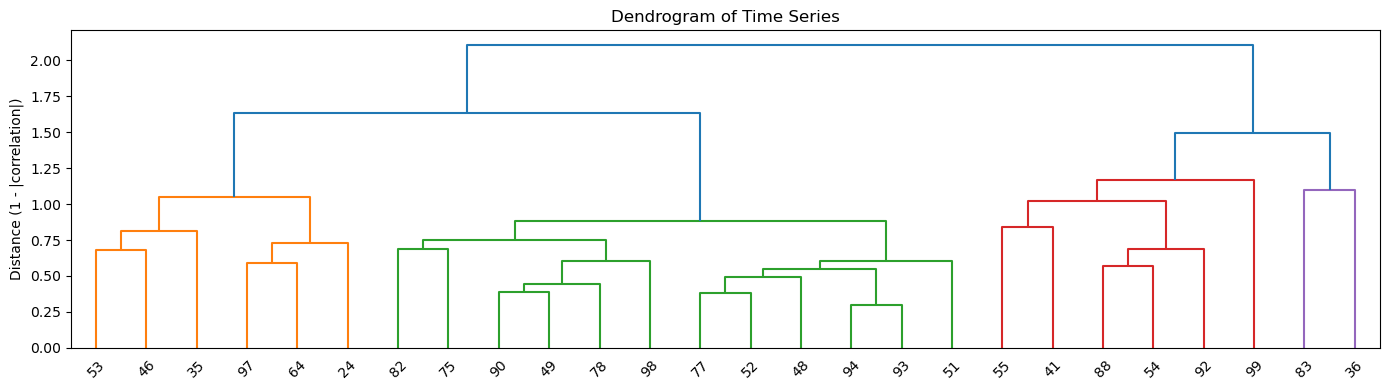

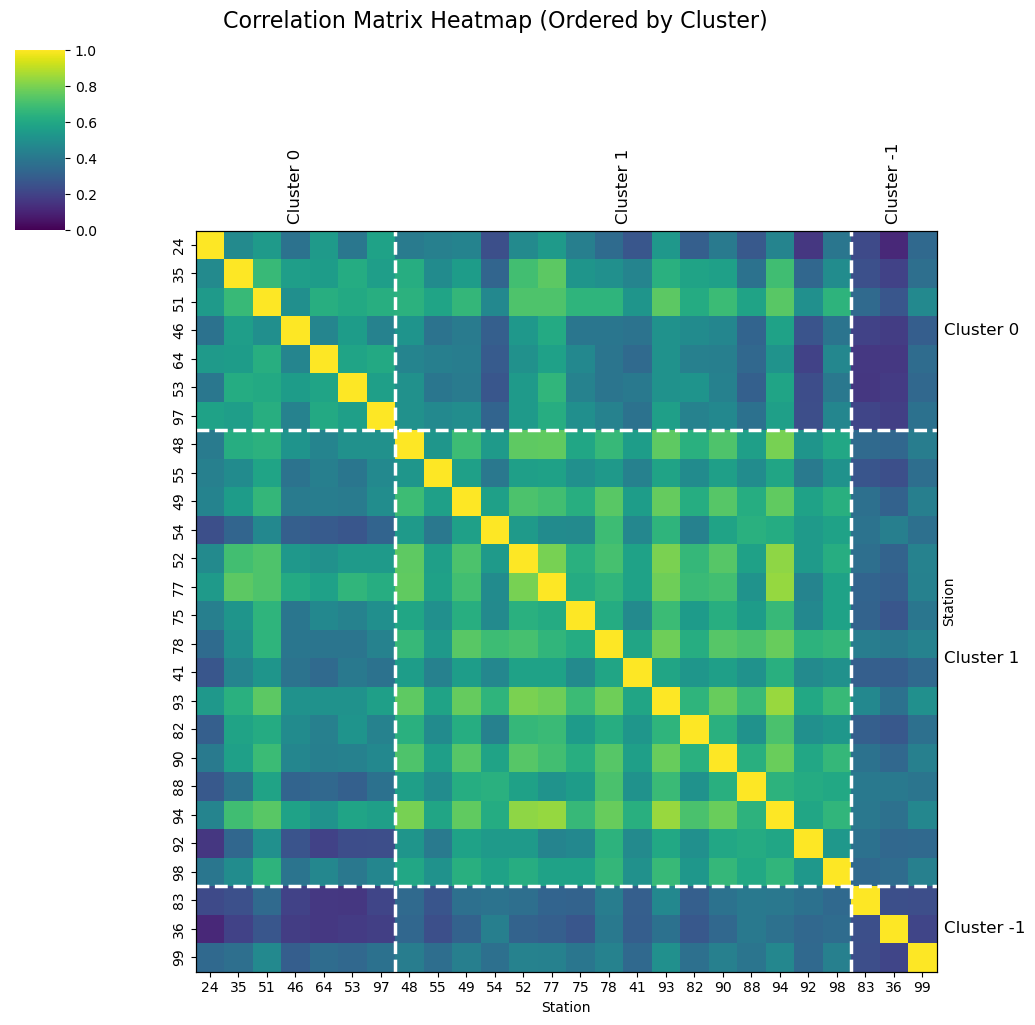

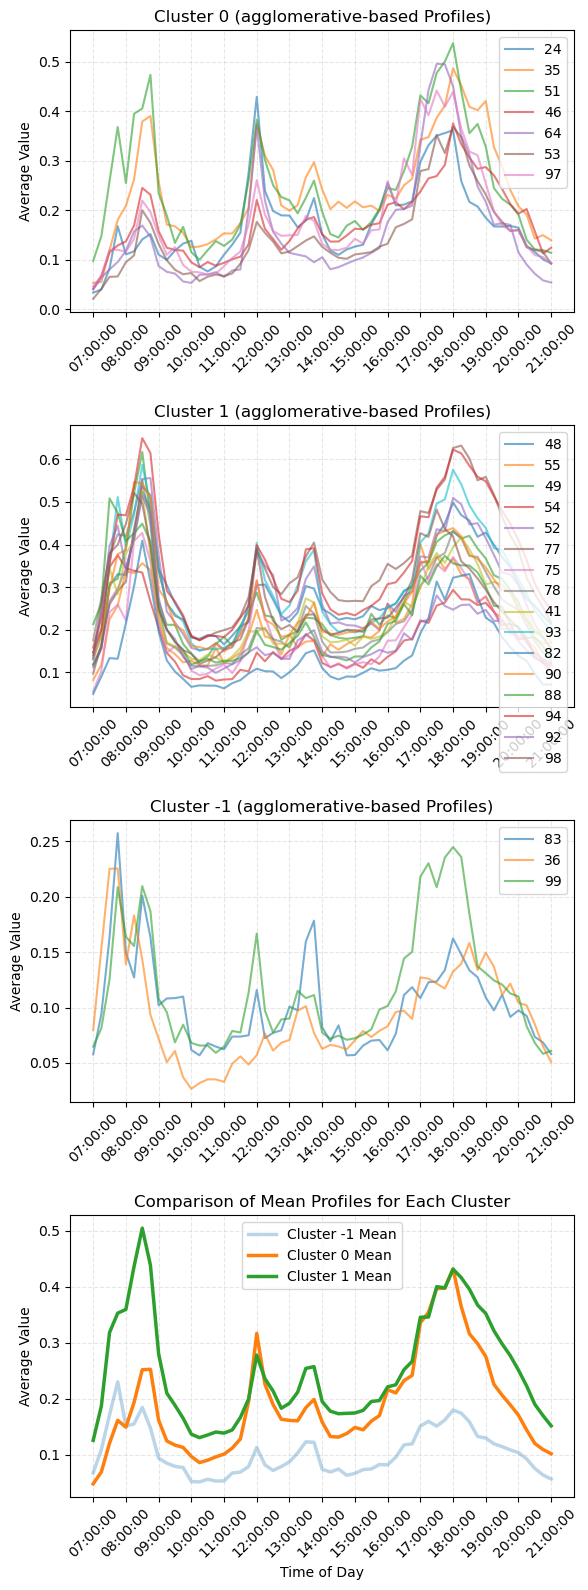

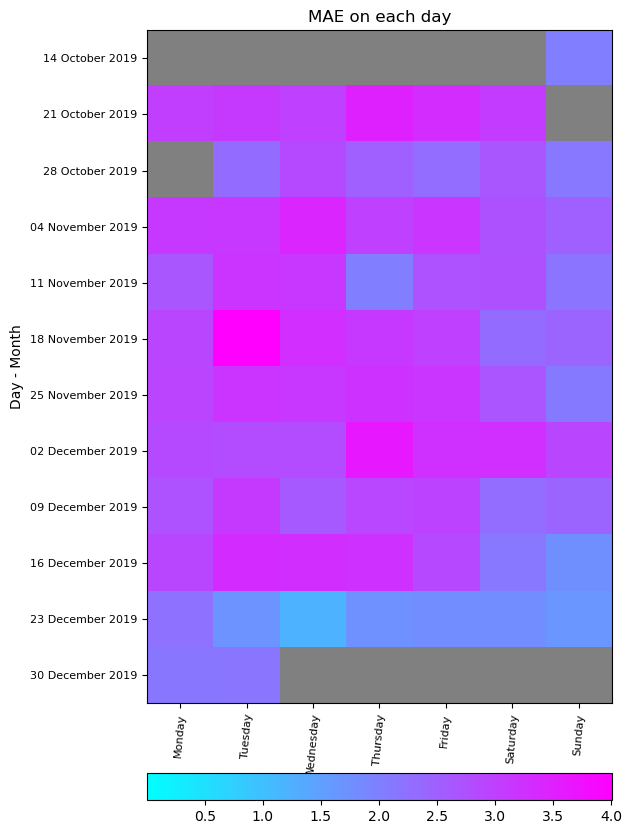

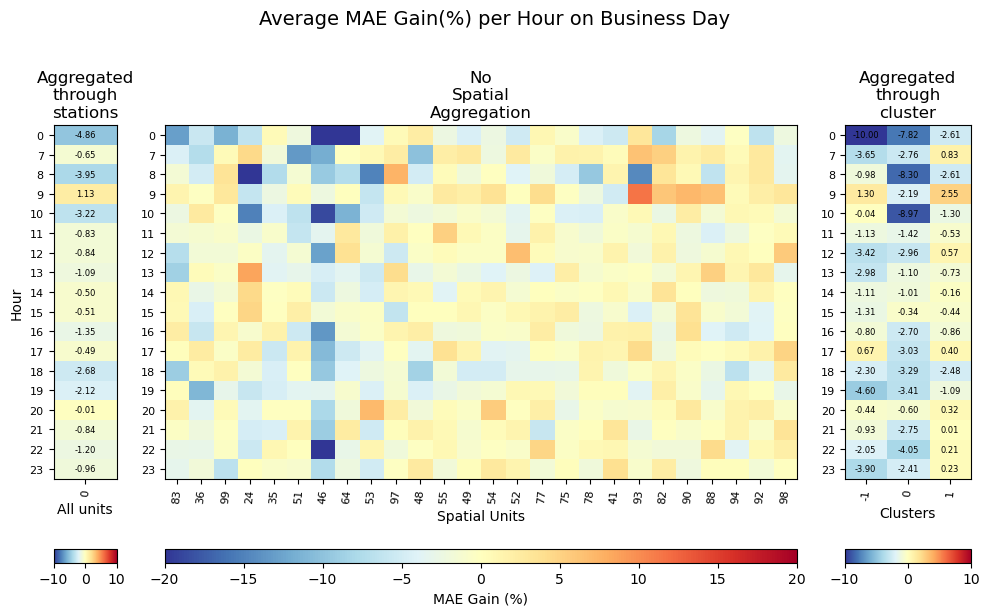


Comparison on between models across all time-slots followed by comparison on Rainy Events Only
Number of rainy time-slots in the train set:
 Between 0 and 0.05 mm: 755, i.e 5.04 % of the train set and 36.14 % of the rainy time-slots
 Between 0.05 and 0.5 mm: 1003, i.e 6.70 % of the train set and 48.01 % of the rainy time-slots
 Between 0.5 and 1 mm: 338, i.e 2.26 % of the train set and 16.18 % of the rainy time-slots
 Between 1 and inf mm: 446, i.e 2.98 % of the train set and 21.35 % of the rainy time-slots
Number of rainy time-slots in the train set: 2089, i.e 13.96 % of the train set
Number of rainy time-slots in the test set: 1158, i.e 23.21 % of the test set

Model1 correspond to :  STAEformer_bike_out_calendar__e100_h1_bis
Model2 correspond to :  STAEformer_bike_out_bike_in_calendar_early_fusion_shared_embedding__e100_h1_bis
real.size(): torch.Size([1158, 26])
predict1.size(): torch.Size([1158, 26])
predict2.size(): torch.Size([1158, 26])
real.size(): torch.Size([1158, 26])
predi

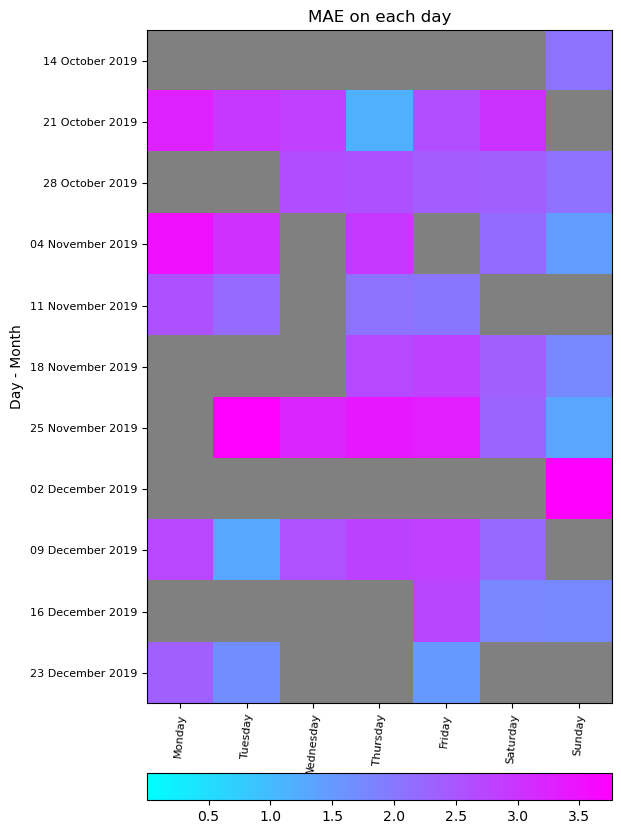

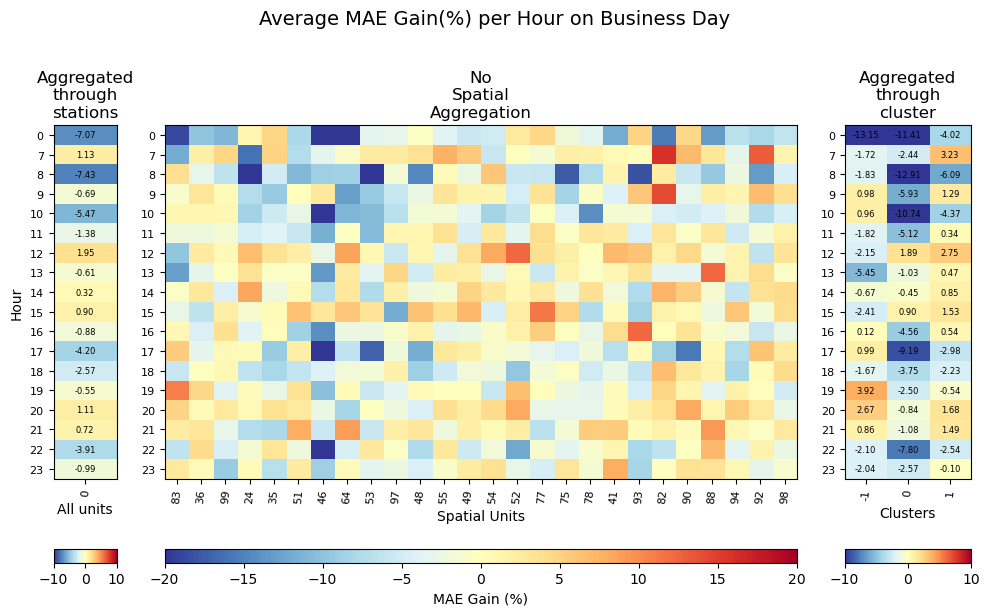


STAEformer_bike_out_calendar__e100_h1:   All Steps RMSE = 4.06664, MAE = 2.57112, MASE = 0.76915, MAPE = 51.49595
STAEformer_bike_out_bike_in_calendar_late_fusion_BackBone_InEmb24_adp16__e100_h1:   All Steps RMSE = 4.07957, MAE = 2.57314, MASE = 0.76976, MAPE = 51.25290
STAEformer_bike_out_bike_in_calendar_late_fusion_simple_embedding__e100_h1:   All Steps RMSE = 4.08437, MAE = 2.58537, MASE = 0.77341, MAPE = 52.45655
STAEformer_bike_out_bike_in_calendar_early_fusion_shared_embedding__e100_h1:   All Steps RMSE = 4.04415, MAE = 2.56172, MASE = 0.76634, MAPE = 51.20654

Trial ID 1:  _STAEformer_bike_out_calendar__e100_h1_bis1_f5
Trial ID 2:  _STAEformer_bike_out_bike_in_calendar_early_fusion_independant_embedding__e100_h1_bis1_f5
model_save_path for trial id1:  /home/rrochas/prediction-validation/save/K_fold_validation/training_wo_HP_tuning/pipeline_bike_out/bike_out_STAEformer/best_models/STAEformer_bike_out_calendar__e100_h1_bis1_f5.pkl
----------------------------------------
Loading

/home/rrochas/prediction-validation/pipeline/clustering/clustering.py:322: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linked = linkage(self.dist_matrix.values, method=self.model.linkage)


Model1 correspond to :  STAEformer_bike_out_calendar__e100_h1_bis
Model2 correspond to :  STAEformer_bike_out_bike_in_calendar_early_fusion_independant_embedding__e100_h1_bis
real.size(): torch.Size([4989, 26])
predict1.size(): torch.Size([4989, 26])
predict2.size(): torch.Size([4989, 26])
real.size(): torch.Size([4989, 26])
predict1.size(): torch.Size([4989, 26])
predict2.size(): torch.Size([4989, 26])
real.size(): torch.Size([4989, 26])
predict1.size(): torch.Size([4989, 26])
predict2.size(): torch.Size([4989, 26])
real.size(): torch.Size([4989, 26])
predict1.size(): torch.Size([4989, 26])
predict2.size(): torch.Size([4989, 26])
real.size(): torch.Size([4989, 26])
predict1.size(): torch.Size([4989, 26])
predict2.size(): torch.Size([4989, 26])


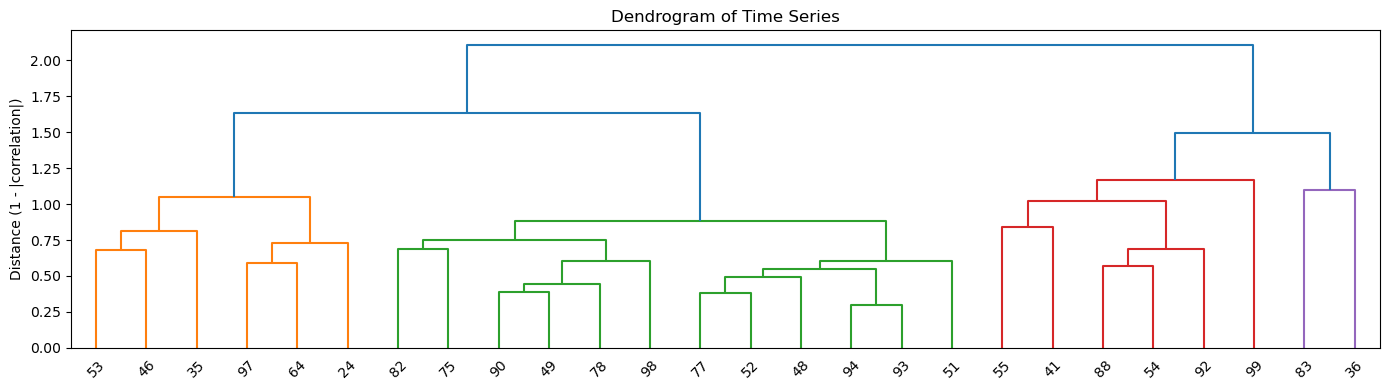

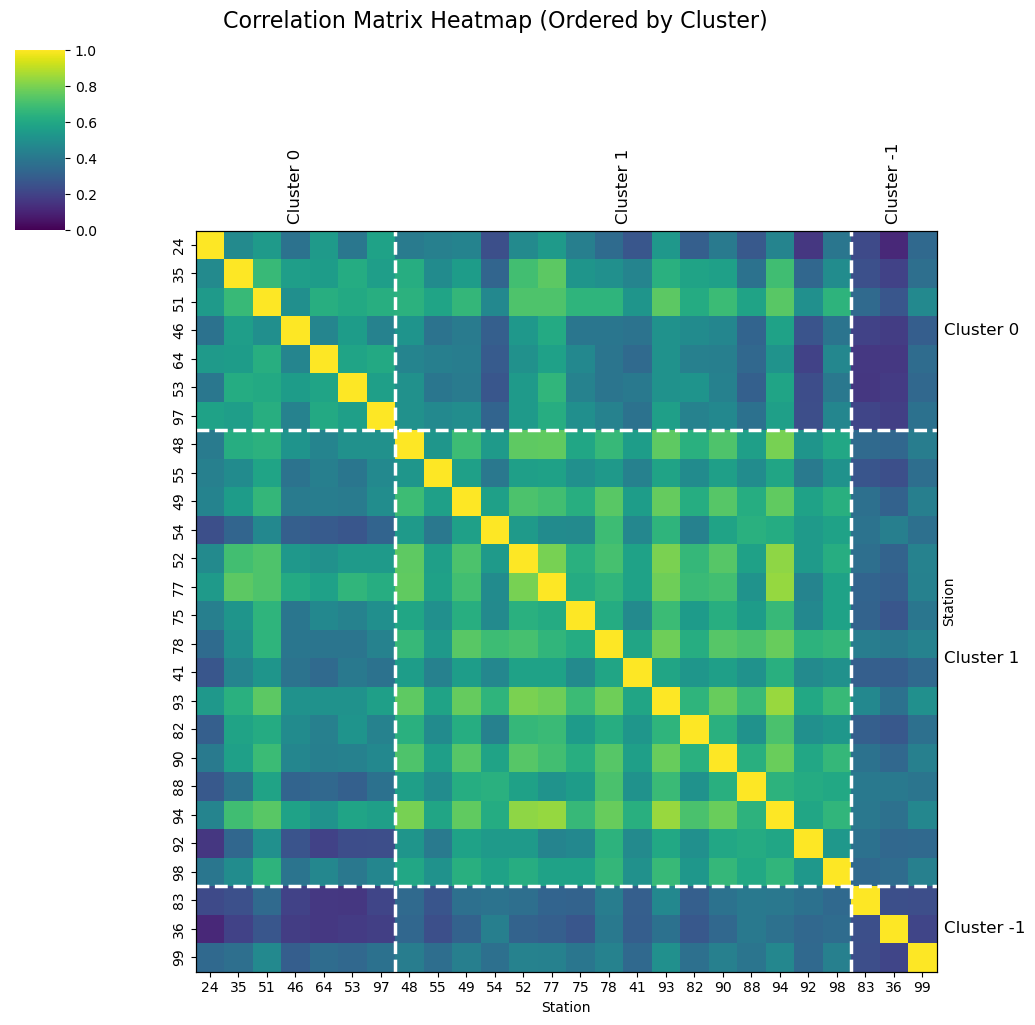

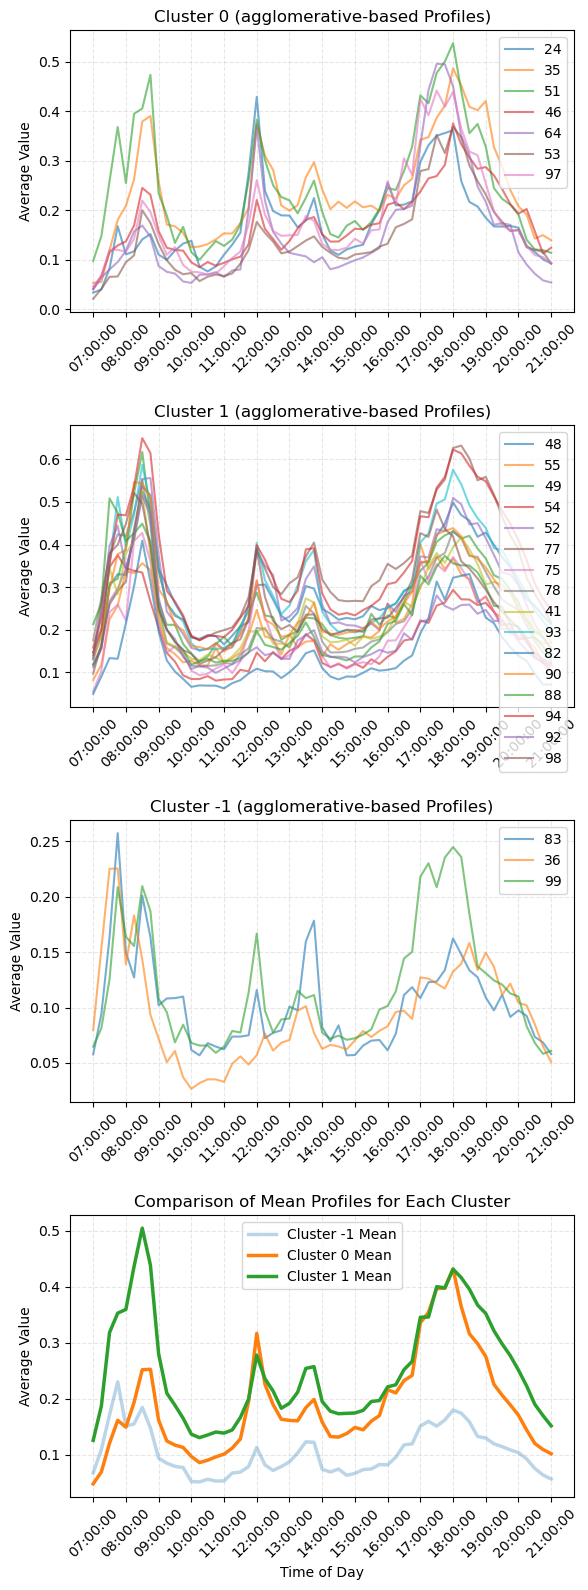

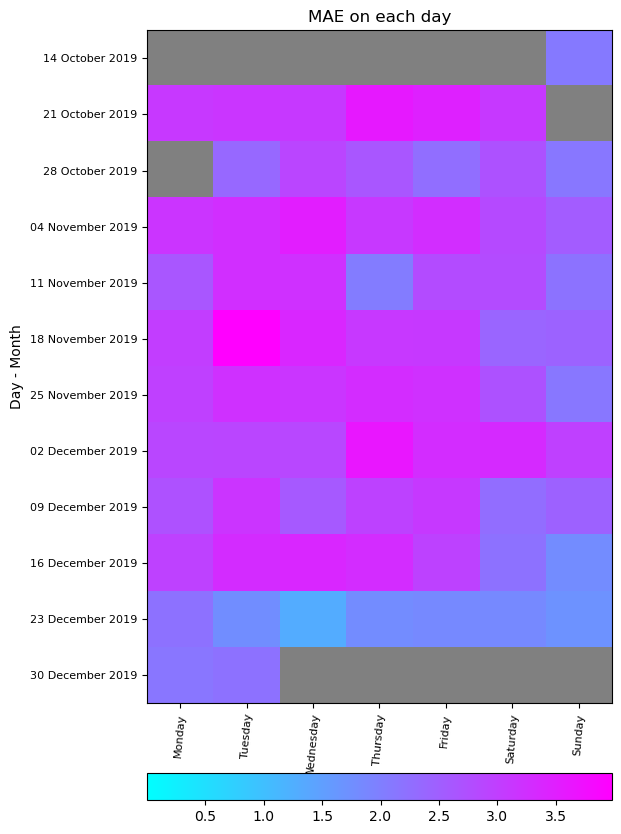

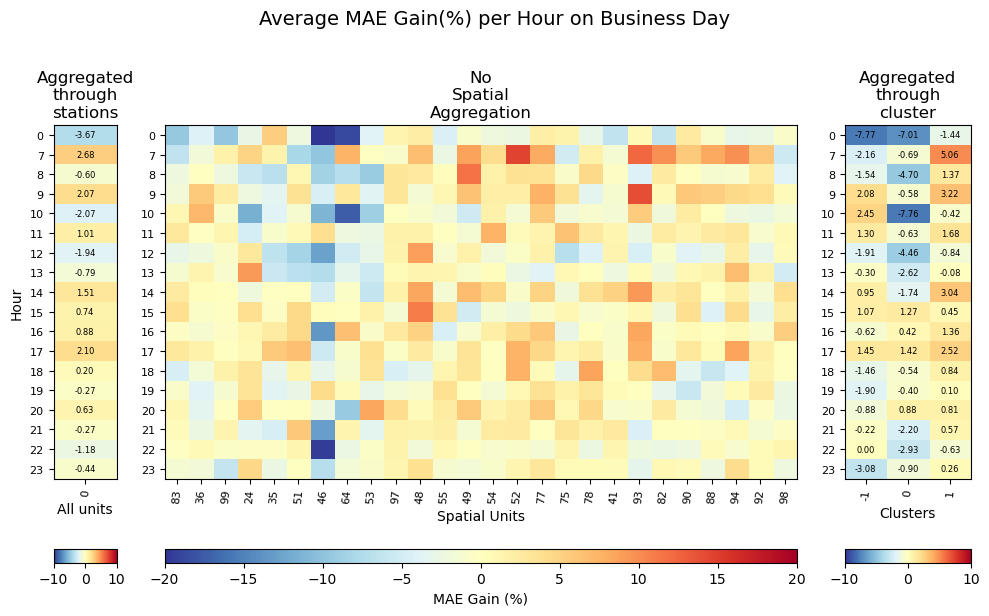


Comparison on between models across all time-slots followed by comparison on Rainy Events Only
Number of rainy time-slots in the train set:
 Between 0 and 0.05 mm: 755, i.e 5.04 % of the train set and 36.14 % of the rainy time-slots
 Between 0.05 and 0.5 mm: 1003, i.e 6.70 % of the train set and 48.01 % of the rainy time-slots
 Between 0.5 and 1 mm: 338, i.e 2.26 % of the train set and 16.18 % of the rainy time-slots
 Between 1 and inf mm: 446, i.e 2.98 % of the train set and 21.35 % of the rainy time-slots
Number of rainy time-slots in the train set: 2089, i.e 13.96 % of the train set
Number of rainy time-slots in the test set: 1158, i.e 23.21 % of the test set

Model1 correspond to :  STAEformer_bike_out_calendar__e100_h1_bis
Model2 correspond to :  STAEformer_bike_out_bike_in_calendar_early_fusion_independant_embedding__e100_h1_bis
real.size(): torch.Size([1158, 26])
predict1.size(): torch.Size([1158, 26])
predict2.size(): torch.Size([1158, 26])
real.size(): torch.Size([1158, 26])


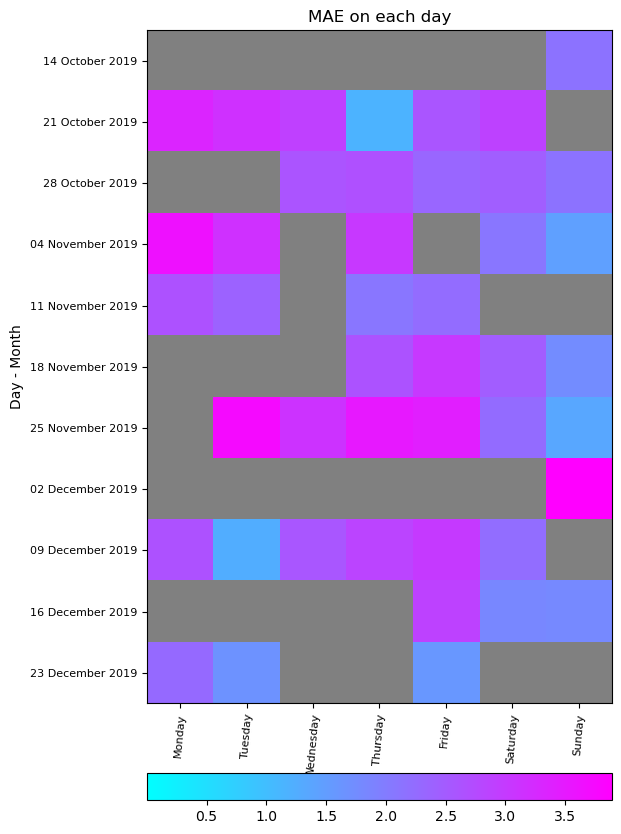

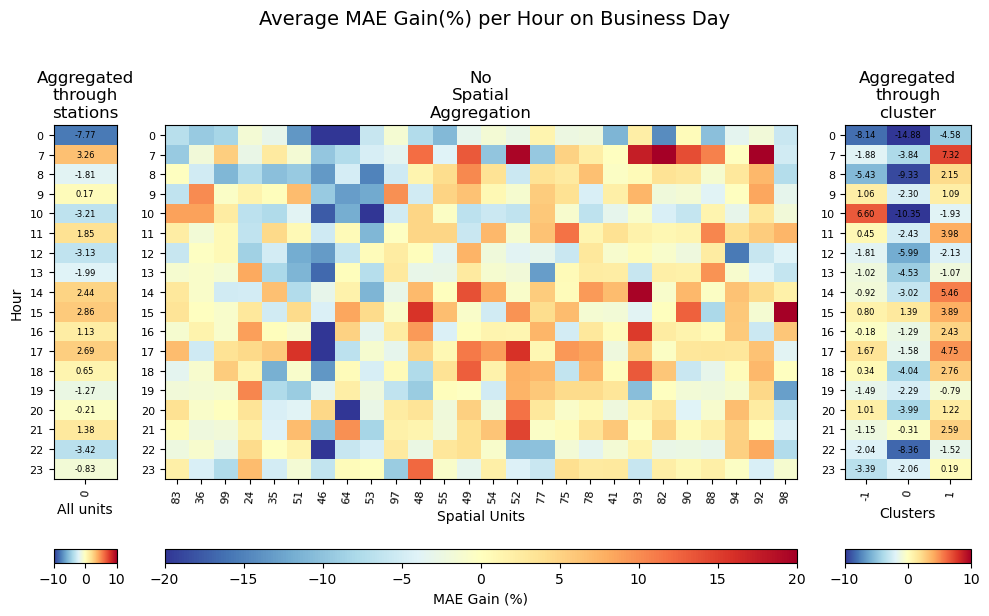


STAEformer_bike_out_calendar__e100_h1:   All Steps RMSE = 4.06664, MAE = 2.57112, MASE = 0.76915, MAPE = 51.49595
STAEformer_bike_out_bike_in_calendar_late_fusion_BackBone_InEmb24_adp16__e100_h1:   All Steps RMSE = 4.07957, MAE = 2.57314, MASE = 0.76976, MAPE = 51.25290
STAEformer_bike_out_bike_in_calendar_late_fusion_simple_embedding__e100_h1:   All Steps RMSE = 4.08437, MAE = 2.58537, MASE = 0.77341, MAPE = 52.45655
STAEformer_bike_out_bike_in_calendar_early_fusion_shared_embedding__e100_h1:   All Steps RMSE = 4.04415, MAE = 2.56172, MASE = 0.76634, MAPE = 51.20654
STAEformer_bike_out_bike_in_calendar_early_fusion_independant_embedding__e100_h1:   All Steps RMSE = 4.07856, MAE = 2.57397, MASE = 0.77000, MAPE = 51.10087

Trial ID 1:  _STAEformer_bike_out_calendar__e100_h1_bis1_f5
Trial ID 2:  _STAEformer_bike_out_bike_in_calendar_early_fusion_BackBone_InEmb24_adp16__e100_h1_bis1_f5
model_save_path for trial id1:  /home/rrochas/prediction-validation/save/K_fold_validation/training_wo_

/home/rrochas/prediction-validation/pipeline/clustering/clustering.py:322: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linked = linkage(self.dist_matrix.values, method=self.model.linkage)


Model1 correspond to :  STAEformer_bike_out_calendar__e100_h1_bis
Model2 correspond to :  STAEformer_bike_out_bike_in_calendar_early_fusion_BackBone_InEmb24_adp16__e100_h1_bis
real.size(): torch.Size([4989, 26])
predict1.size(): torch.Size([4989, 26])
predict2.size(): torch.Size([4989, 26])
real.size(): torch.Size([4989, 26])
predict1.size(): torch.Size([4989, 26])
predict2.size(): torch.Size([4989, 26])
real.size(): torch.Size([4989, 26])
predict1.size(): torch.Size([4989, 26])
predict2.size(): torch.Size([4989, 26])
real.size(): torch.Size([4989, 26])
predict1.size(): torch.Size([4989, 26])
predict2.size(): torch.Size([4989, 26])
real.size(): torch.Size([4989, 26])
predict1.size(): torch.Size([4989, 26])
predict2.size(): torch.Size([4989, 26])


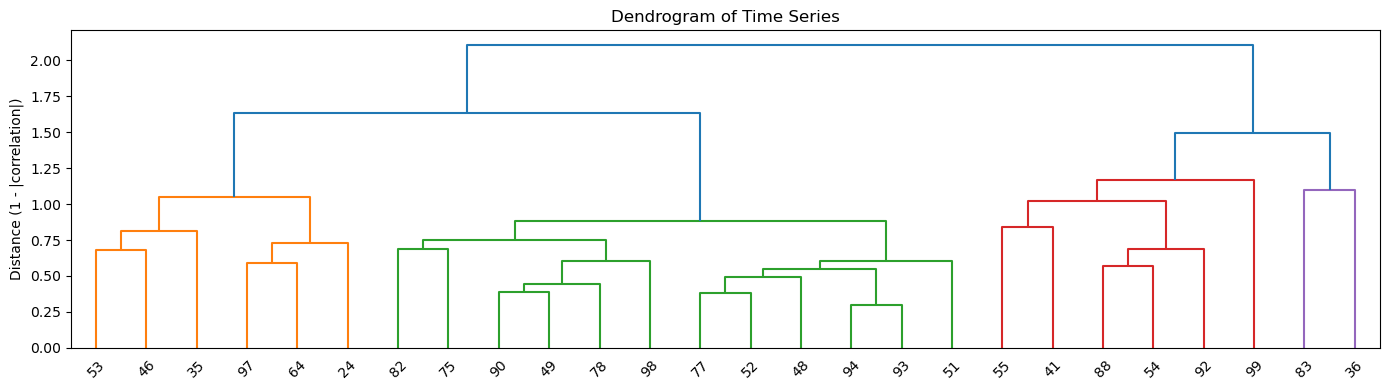

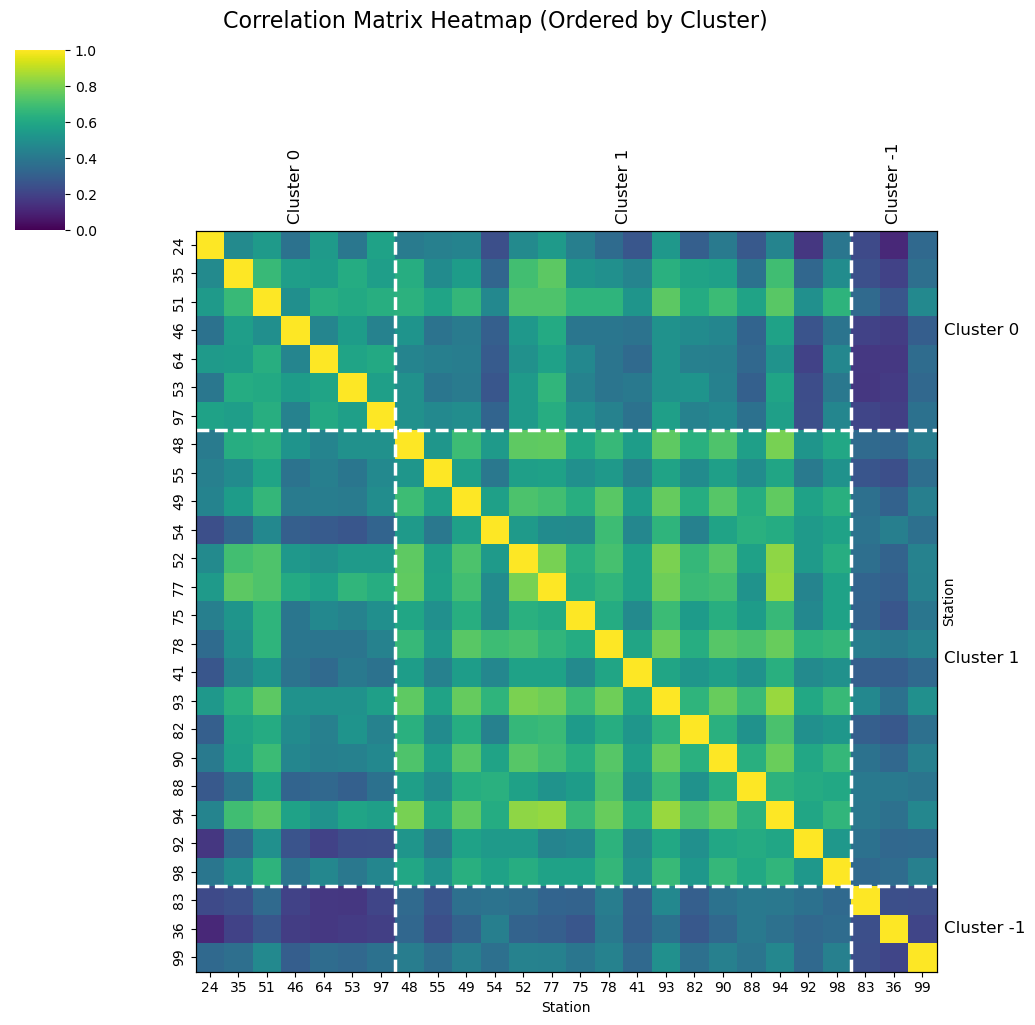

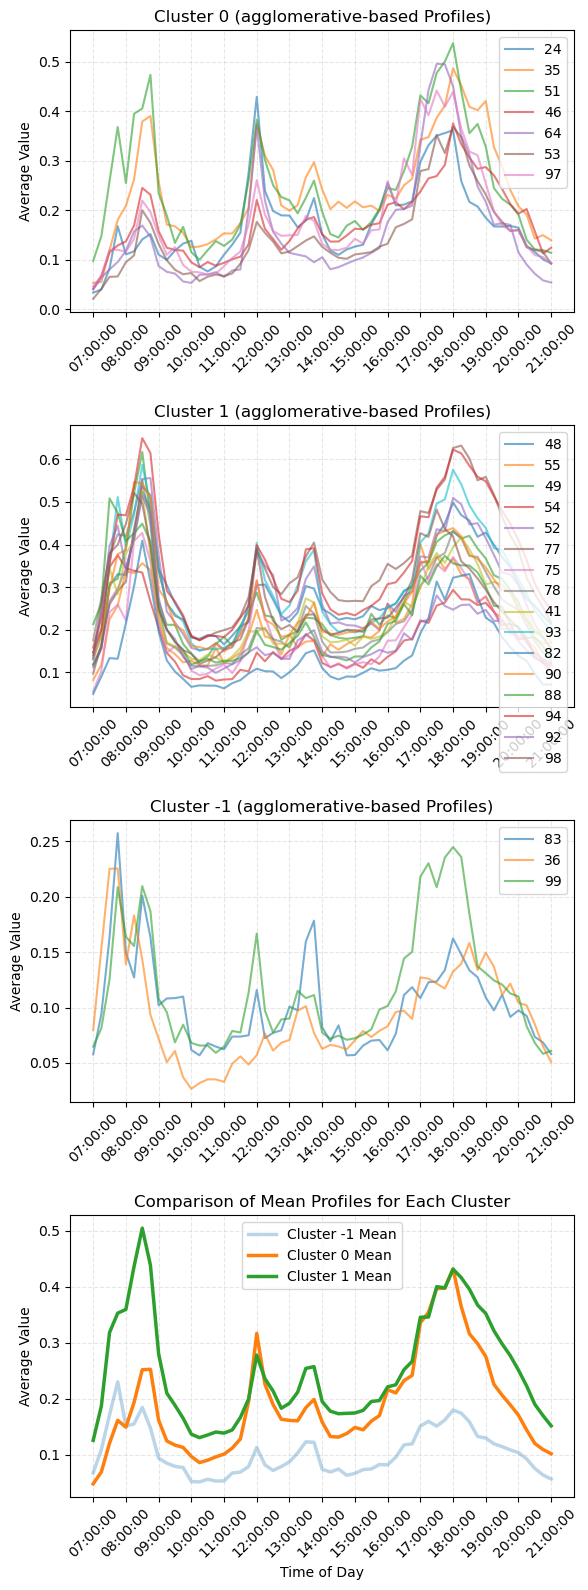

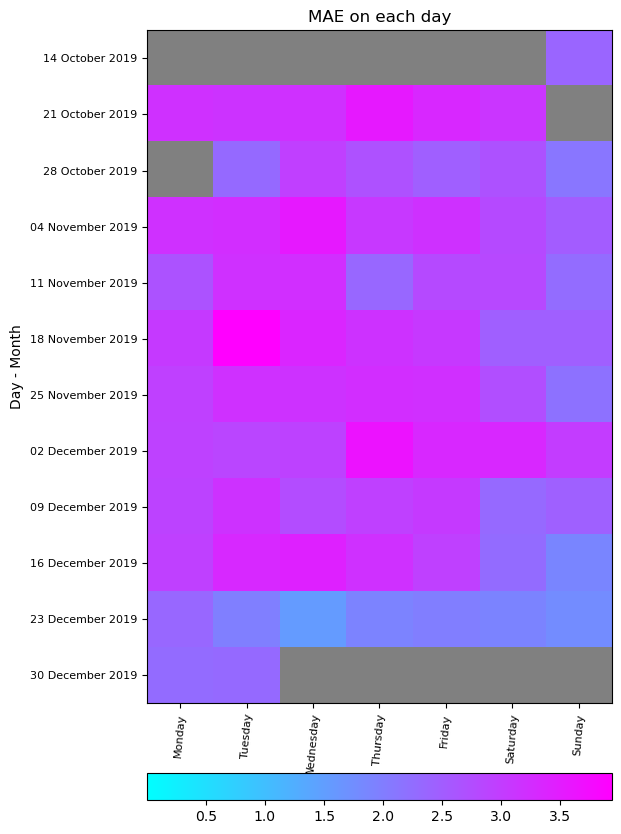

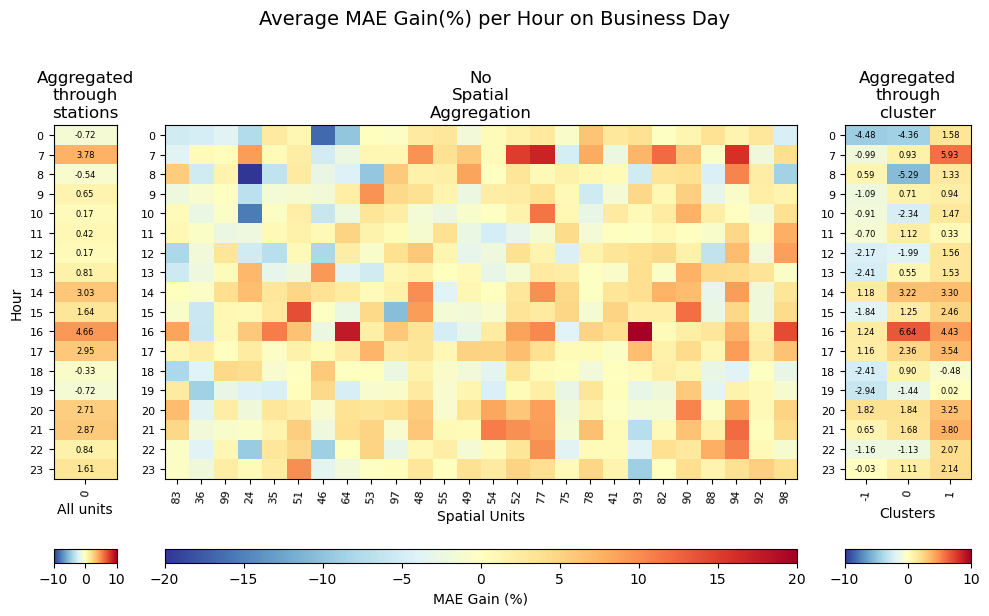


Comparison on between models across all time-slots followed by comparison on Rainy Events Only
Number of rainy time-slots in the train set:
 Between 0 and 0.05 mm: 755, i.e 5.04 % of the train set and 36.14 % of the rainy time-slots
 Between 0.05 and 0.5 mm: 1003, i.e 6.70 % of the train set and 48.01 % of the rainy time-slots
 Between 0.5 and 1 mm: 338, i.e 2.26 % of the train set and 16.18 % of the rainy time-slots
 Between 1 and inf mm: 446, i.e 2.98 % of the train set and 21.35 % of the rainy time-slots
Number of rainy time-slots in the train set: 2089, i.e 13.96 % of the train set
Number of rainy time-slots in the test set: 1158, i.e 23.21 % of the test set

Model1 correspond to :  STAEformer_bike_out_calendar__e100_h1_bis
Model2 correspond to :  STAEformer_bike_out_bike_in_calendar_early_fusion_BackBone_InEmb24_adp16__e100_h1_bis
real.size(): torch.Size([1158, 26])
predict1.size(): torch.Size([1158, 26])
predict2.size(): torch.Size([1158, 26])
real.size(): torch.Size([1158, 26])

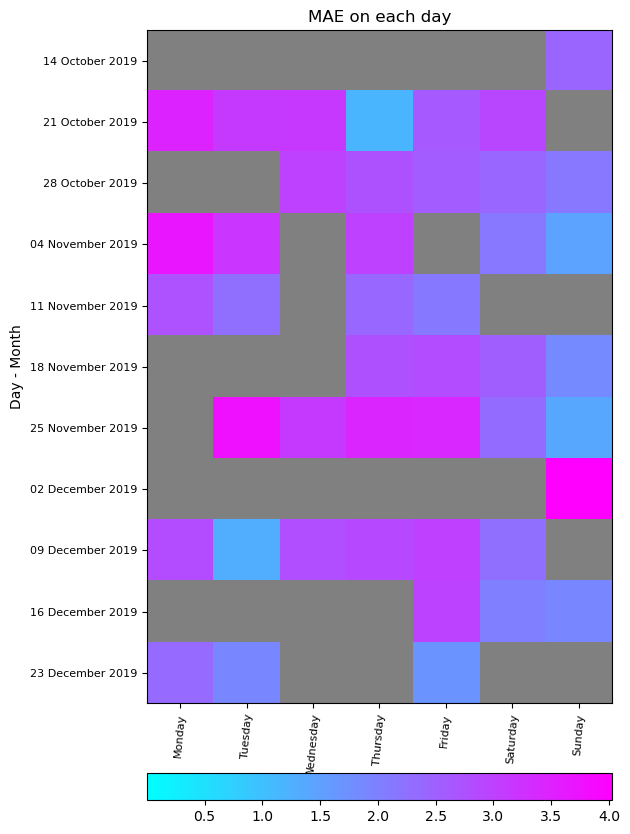

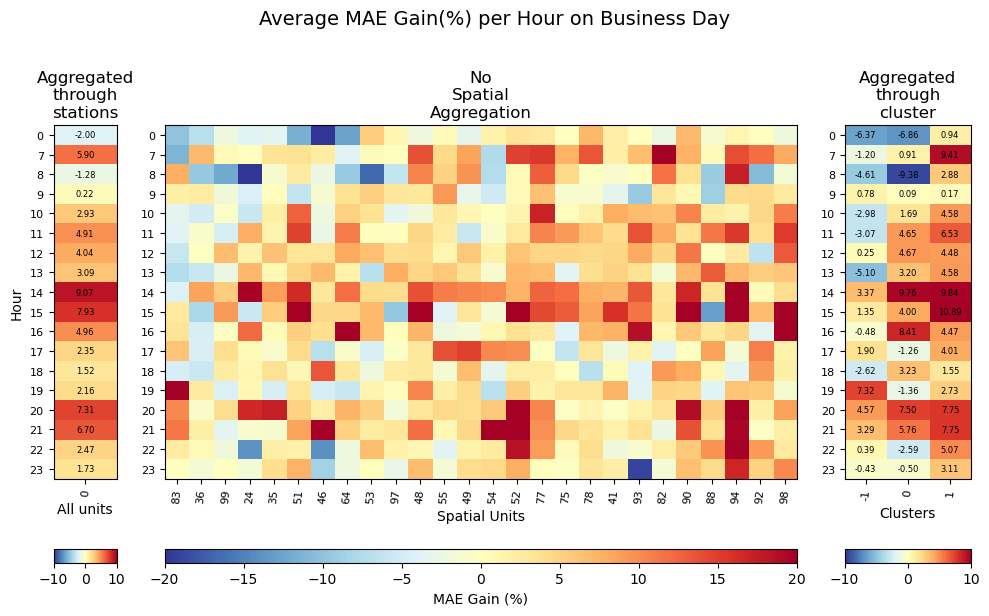


STAEformer_bike_out_calendar__e100_h1:   All Steps RMSE = 4.06664, MAE = 2.57112, MASE = 0.76915, MAPE = 51.49595
STAEformer_bike_out_bike_in_calendar_late_fusion_BackBone_InEmb24_adp16__e100_h1:   All Steps RMSE = 4.07957, MAE = 2.57314, MASE = 0.76976, MAPE = 51.25290
STAEformer_bike_out_bike_in_calendar_late_fusion_simple_embedding__e100_h1:   All Steps RMSE = 4.08437, MAE = 2.58537, MASE = 0.77341, MAPE = 52.45655
STAEformer_bike_out_bike_in_calendar_early_fusion_shared_embedding__e100_h1:   All Steps RMSE = 4.04415, MAE = 2.56172, MASE = 0.76634, MAPE = 51.20654
STAEformer_bike_out_bike_in_calendar_early_fusion_independant_embedding__e100_h1:   All Steps RMSE = 4.07856, MAE = 2.57397, MASE = 0.77000, MAPE = 51.10087
STAEformer_bike_out_bike_in_calendar_early_fusion_BackBone_InEmb24_adp16__e100_h1:   All Steps RMSE = 4.10133, MAE = 2.59493, MASE = 0.77627, MAPE = 51.68139

   Horizon:  4


ValueError: No baseline found in ['STAEformer_bike_out_bike_in_calendar_late_fusion_BackBone_InEmb24_adp16__e100_h1', 'STAEformer_bike_out_bike_in_calendar_late_fusion_simple_embedding__e100_h1', 'STAEformer_bike_out_bike_in_calendar_early_fusion_shared_embedding__e100_h1', 'STAEformer_bike_out_bike_in_calendar_early_fusion_independant_embedding__e100_h1', 'STAEformer_bike_out_calendar__e100_h1', 'STAEformer_bike_out_bike_in_calendar_early_fusion_BackBone_InEmb24_adp16__e100_h1']

In [1]:
# ==================================================
# IMPORT
import re 
import os 
import pandas as pd
import sys
import torch 
import importlib
import itertools 
import copy 
import torch._dynamo as dynamo; dynamo.graph_break()
torch._dynamo.config.verbose=True

if torch.cuda.is_available():
    torch.backends.cuda.matmul.allow_tf32 = True
    torch.backends.cudnn.allow_tf32  = True

current_file_path = os.path.abspath(os.getcwd())
parent_dir = os.path.abspath(os.path.join(current_file_path,'..','..'))
if parent_dir not in sys.path:
    sys.path.insert(0,parent_dir)

from experiences.common_parameter import possible_target_kwargs
from experiences.get_desagregated_plot import get_desagregated_gains
from experiences.pipeline_desag.utils import plotting_boxplot_of_trials
from experiences.pipeline_desag.MetricExporter import MetricExporter
from examples.accuracy_comparison import get_cluster
from examples.train_model import load_init_model_trainer_ds
from examples.benchmark import local_get_args
from constants.paths import ROOT
inside_saved_folder = 'K_fold_validation/training_wo_HP_tuning'
folder_path = f"{ROOT}/save/{inside_saved_folder}"

# ------------------------------------------
exp_i = 'pipeline_bike_out'
freq = '15min' #'15min'  
horizons = [1,4] # [4]  #[1,4]
model_name = 'STAEformer'
target_data = 'bike_out' 
metrics = ['RMSE','MAE','MASE']
dataset_for_coverage = ['bike_in','bike_out','subway_in','subway_out']
possible_contextual_dataset_names = [
                                    ['bike_in'],
                                    # ['subway_in_subway_out'],
                                    # ['subway_in_subway_out','bike_in','weather'],
                                    #  ['subway_in_subway_out','bike_in'],
                                    #  ['weather'],
                                    #  ['weather','bike_in'],
                                    #  ['weather','subway_in_subway_out'],
                                     ] # ['netmob_POIs'] #['subway_out']
TRIVIAL_TEST = False
REPEAT_TRIAL = 5 #5 
topk_percent = 0.8
# ------------------------------------------

save_path_figures = None
device = torch.device('cuda:0')
add_name_save = '' #'_clipping'  # ''  # '_trial2'

station_clustering = True

# ==================================================
# BOXPLOT FIGURE :
''' 
Load saved results from f"{ROOT}/experiences.pipeline_desag.results.{exp_i}.{exp_i}.py"
'''
for contextual_dataset_names in possible_contextual_dataset_names:

    module_path = f"experiences.pipeline_desag.results.{exp_i}.{exp_i}"
    module = importlib.import_module(module_path)
    importlib.reload(module)
    results_saved = module.results
    # re._pattern = rf'{model_name}_{target_data}.*?bis'
    re._pattern = rf"{model_name}_{target_data}_(?:{'_'.join(contextual_dataset_names)}|calendar).*?bis"
    trials = [c[:-4] for c in list(set(re.findall(re._pattern, results_saved)))]

    print('re._pattern: ',re._pattern)
    print('trials found: ',len(trials))
    for trial in trials:
        print(f"   {trial}")

    trials = [t for t in trials if t[-2:] == 'h1']
    print(trials)


    # exporter = MetricExporter(results_saved, contextual_dataset_names)
    # exporter.export_all(folder_path=save_path_figures, exp_i=exp_i)


    if False: 
        plotting_boxplot_of_trials(trials,
                                exp_i,
                                metrics,
                                folder_path,
                                target_data= target_data,
                                model_name= model_name,
                                dataset_names = contextual_dataset_names,
                                save_path = save_path_figures,
                                n_bis_range = range(1,REPEAT_TRIAL+1),
                                bool_show = True
                
                                )
        


        if station_clustering:
            # Load ds from Target Data 
            args_init = local_get_args(model_name,
                        args_init = None,
                        dataset_names=[target_data],
                        dataset_for_coverage=dataset_for_coverage,
                        modification = {'freq': freq,
                                        'step_ahead': 1,
                                        'horizon_step': 1,
                                        'target_data': target_data,
                                        'target_kwargs' : {target_data: possible_target_kwargs[target_data]},
                                        })
            print(args_init)
            fold_to_evaluate=[args_init.K_fold-1]
            trainer,ds,model,args = load_init_model_trainer_ds(fold_to_evaluate,None,args_init,{},None)

            colmumn_name = 'Station'
            train_input = ds.train_input
            train_time_slots = ds.tensor_limits_keeper.df_verif_train.stack().unique()
            train_input = pd.DataFrame(train_input.numpy(),index = train_time_slots,columns = ds.spatial_unit)
            train_input = train_input.reindex(pd.date_range(start=train_input.index.min(),end=train_input.index.max(),freq=args_init.freq))
            train_input.columns.name = colmumn_name

            # Keep top k% :
            if topk_percent is not None: 
                s = train_input.sum()
                threshold = s.quantile(1-topk_percent)
                top_ids = s[s>=threshold].index.tolist()
                train_input = train_input[top_ids]

            # Get Clustering of stations from these inputs:
            clusterer = get_cluster(train_input,
                                    temporal_agg='business_day',
                                    normalisation_type ='minmax',
                                    index= colmumn_name,
                                    city=ds.city,
                                    n_clusters=5, 
                                    linkage_method='complete', 
                                    metric='precomputed',
                                    min_samples=2,
                                    heatmap= True, 
                                    daily_profile=True, 
                                    dendrogram=True,
                                    bool_plot = True,
                                    folder_path= None,
                                    save_name = None, #f"{exp_i}_topk{int(topk_percent*100)}_clusters" if topk_percent is not None else f"{exp_i}"
                                    )
            clusters = clusterer.clusters
            print('Clusters: ',clusterer.clusters)
        else:
            clusters = None
    else:
        clusters = None

    # -- ON RAINY & NON RAINY : 
    get_desagregated_gains(dic_exp_to_names={exp_i:f'{target_data}_{model_name}'},
                        dic_trials = {exp_i:trials},
                        horizons=horizons,
                        comparison_on_rainy_events=True,
                        range_k=range(1,REPEAT_TRIAL+1),
                        station_clustering=station_clustering,
                        folder_path=None, #f'{current_file_path}/results',
                        save_bool=False,
                        heatmap= True,
                        daily_profile=True,
                        dendrogram=True,
                        dataset_names =contextual_dataset_names,
                        bool_plot = False,
                        clusters = clusters
                        )


